In [1]:
import numpy as np
import pandas as pd
import contextily as cx

import geopandas as gp
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

pd.set_option("display.precision", 12)
gp.options.display_precision=12

from shapely.geometry import Point

def dms_to_dd(d, m, s):
    dd = d + float(m)/60 + float(s)/3600
    return dd

def ll_to_utm_gdf(shapely_pt_obj):
    gdf = gp.GeoDataFrame({'geometry': [shapely_pt_obj]},crs='EPSG:4326') 
    return gdf.to_crs(gdf.estimate_utm_crs())


In [2]:
# FV1987
print(dms_to_dd(35, 14, 26.82))
print(dms_to_dd(-120, -40., -39.27))

35.24078333333333
-120.677575


In [3]:
# FV1986
print(dms_to_dd(35, 15, 2.8))
print(dms_to_dd(-120, -40., -18.1))

35.25077777777778
-120.67169444444446


In [4]:
# FV1089
print(dms_to_dd(35, 15, 31.8))
print(dms_to_dd(-120, -40, -6.7))

35.258833333333335
-120.66852777777778


In [5]:
# FV1985
print(dms_to_dd(35, 15, 59.01 ))
print(dms_to_dd(-120, -40, -14.34))

35.266391666666664
-120.67065000000001


In [6]:
# FV2060
print(dms_to_dd(35, 15, 41.2))
print(dms_to_dd(-120, -38, -54.7))


35.26144444444444
-120.64852777777779


In [7]:
# FV0331
print(dms_to_dd(35, 15,  37.88))
print(dms_to_dd(-120, -38, -38.37))

35.26052222222222
-120.64399166666668


# Comparing GPS results from phone / GPS / benchmark 

In [8]:
gps_bm = pd.read_excel("GPS_results.xlsx",sheet_name=0)

In [9]:
gps_ph = pd.read_excel("GPS_results.xlsx",sheet_name=1)

In [10]:
all_bm_res = []

for bm_id in list(gps_bm['Benchmark_ID'].unique())[:]:

    if bm_id == "Hilltop":
        continue
    
    print(bm_id)
    
    ref = gps_bm[gps_bm['Benchmark_ID'] == bm_id]
    test = gps_ph[gps_ph['Benchmark_ID'] == bm_id]
    
    bm_res = []

    for idx,x in test.iterrows():
        lat = x['Phone_Lat']
        lon = x['Phone_Lon']

        phone_ll = Point(lon,lat)
        bm_ref_ll = Point(ref['Benchmark_Lon'],ref['Benchmark_Lat'])
        gps_ref_ll = Point(ref['Arrow_Lon'],ref['Arrow_Lat'])

        phone_gdf = gp.GeoDataFrame({'geometry': [phone_ll]},crs='EPSG:4326') 
        arrow_gdf = gp.GeoDataFrame({'geometry': [gps_ref_ll]},crs='EPSG:4326') 
        bench_gdf = gp.GeoDataFrame({'geometry': [bm_ref_ll]},crs='EPSG:4326') 

        phone_gdf = phone_gdf.to_crs(phone_gdf.estimate_utm_crs())
        bench_gdf = bench_gdf.to_crs(bench_gdf.estimate_utm_crs())
        arrow_gdf = arrow_gdf.to_crs(arrow_gdf.estimate_utm_crs())

        phone_bench_err = phone_gdf.distance(bench_gdf).values[0]
        phone_gps_err = phone_gdf.distance(arrow_gdf).values[0]
        bench_gps_err = bench_gdf.distance(arrow_gdf).values[0]

        results_df = pd.DataFrame([x['Benchmark_ID'], phone_bench_err, phone_gps_err, bench_gps_err]).T
        results_df.columns = ['Benchmark_ID','ph_bm_err', 'ph_gps_err', 'gps_bm_err']
        bm_res.append(results_df)
    
    all_bm_res.append(pd.concat(bm_res, axis = 0))

FV1987
FV1986
FV1089
FV1985
FV2060
FV0331


<AxesSubplot:ylabel='errors (meters)'>

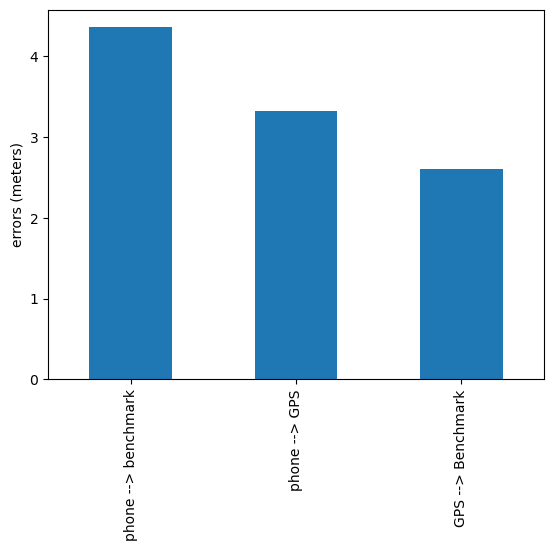

In [11]:
outdf = pd.DataFrame(pd.concat(all_bm_res, axis = 0).mean())
outdf.index = ['phone --> benchmark', 'phone --> GPS', 'GPS --> Benchmark']
outdf.plot(kind ='bar',ylabel = 'errors (meters)',linewidth=3, legend = None)

In [12]:
outdf.columns = ['error (m)']

In [13]:
outdf

,error (m)
phone --> benchmark,4.358093682268
phone --> GPS,3.326657338225
GPS --> Benchmark,2.605733123123


# Comparing spatial distribution of errors

FV1987


/opt/anaconda3/envs/rsenv/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/opt/anaconda3/envs/rsenv/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


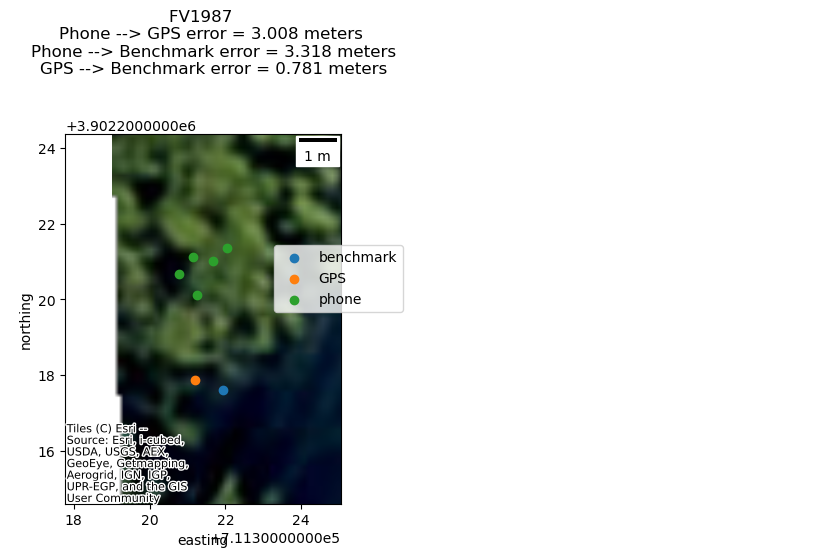

FV1986


/opt/anaconda3/envs/rsenv/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/opt/anaconda3/envs/rsenv/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


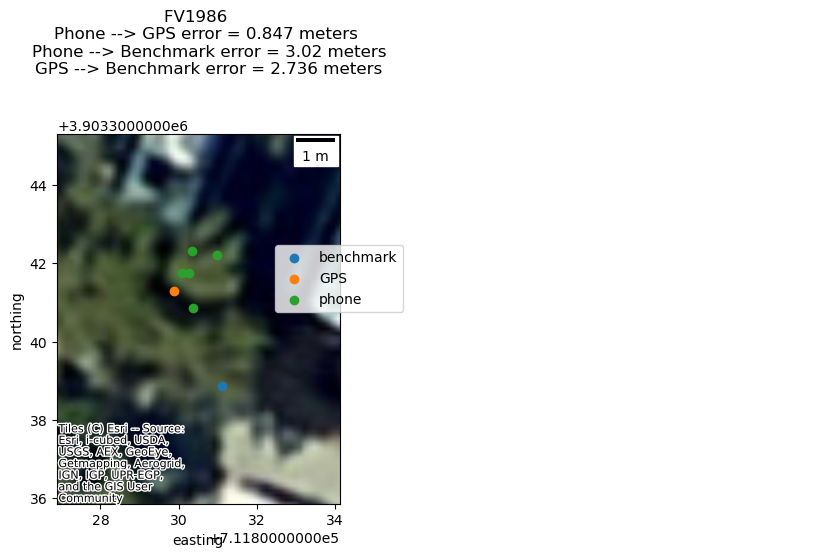

FV1089


/opt/anaconda3/envs/rsenv/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/opt/anaconda3/envs/rsenv/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


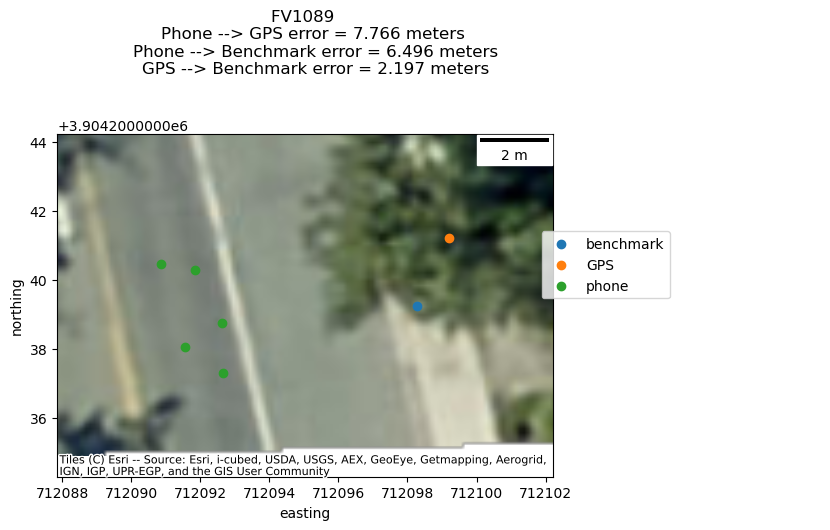

FV1985


/opt/anaconda3/envs/rsenv/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/opt/anaconda3/envs/rsenv/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


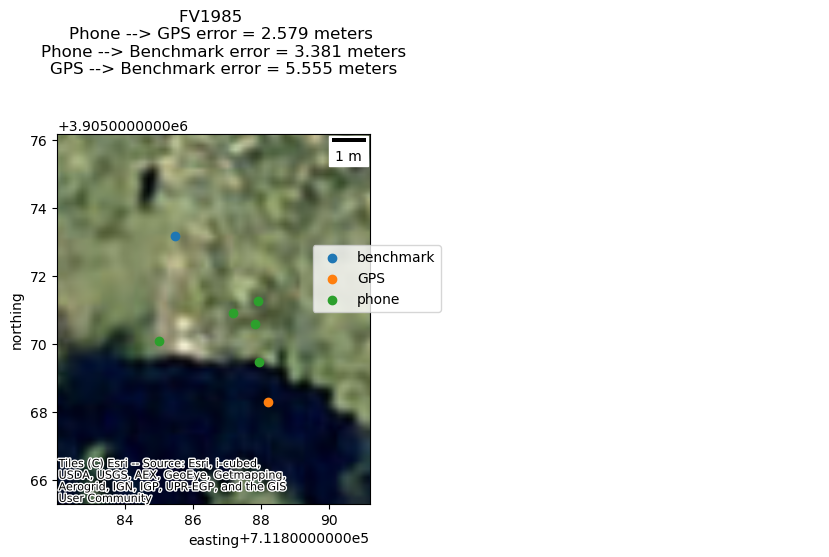

FV2060


/opt/anaconda3/envs/rsenv/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/opt/anaconda3/envs/rsenv/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


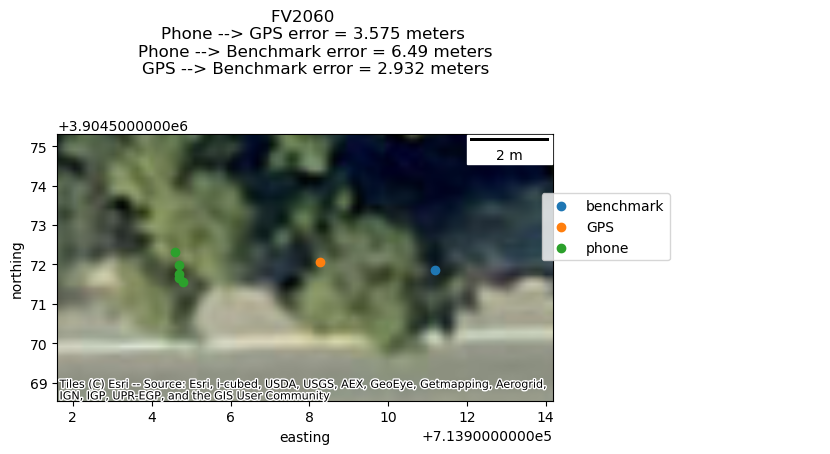

FV0331


/opt/anaconda3/envs/rsenv/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/opt/anaconda3/envs/rsenv/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


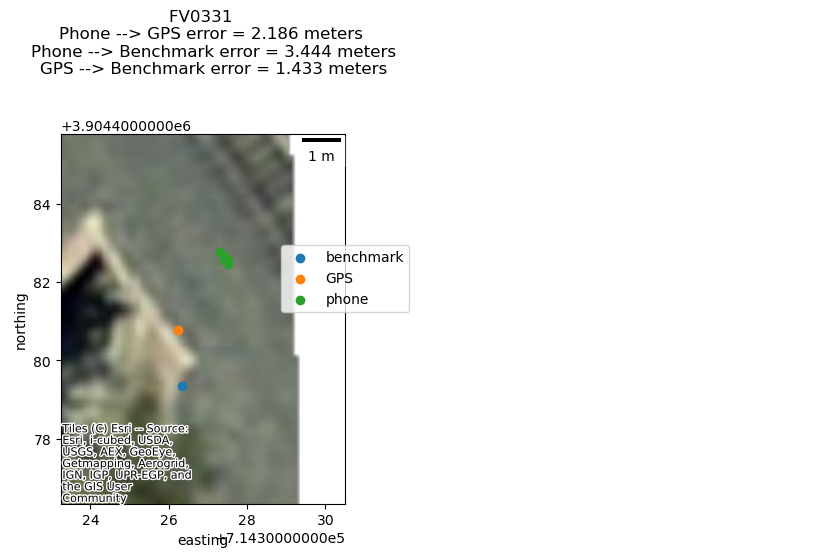

In [14]:
all_bm_res = []

for bm_id in list(gps_bm['Benchmark_ID'].unique())[:]:

    if bm_id == "Hilltop":
        continue
    
    print(bm_id)
    
    ref = gps_bm[gps_bm['Benchmark_ID'] == bm_id]
    test = gps_ph[gps_ph['Benchmark_ID'] == bm_id]

    # Get benchmark / gps as gdfs 
    
    bm_ref_ll = Point(ref['Benchmark_Lon'],ref['Benchmark_Lat'])
    gps_ref_ll = Point(ref['Arrow_Lon'],ref['Arrow_Lat'])
    
    bench_gdf = gp.GeoDataFrame({'geometry': [bm_ref_ll]},crs='EPSG:4326') 
    arrow_gdf = gp.GeoDataFrame({'geometry': [gps_ref_ll]},crs='EPSG:4326') 
    
    bench_gdf = bench_gdf.to_crs(bench_gdf.estimate_utm_crs())
    arrow_gdf = arrow_gdf.to_crs(arrow_gdf.estimate_utm_crs())
    
    ph_res_allpts = []

    for idx,x in test.iterrows():
        lat = x['Phone_Lat']
        lon = x['Phone_Lon']

        phone_ll = Point(lon,lat)
        phone_gdf = gp.GeoDataFrame({'geometry': [phone_ll]},crs='EPSG:4326') 
        phone_gdf = phone_gdf.to_crs(phone_gdf.estimate_utm_crs())
        ph_res_allpts.append(phone_gdf)
    
    # concat 
    ph_gdf_allpts = pd.concat(ph_res_allpts)
    
    # calc errors
    ph_bench_error = round(ph_gdf_allpts.distance(bench_gdf).mean(),3)
    ph_gps_error = round(ph_gdf_allpts.distance(arrow_gdf).mean(),3)
    gps_bm_error = round(arrow_gdf.distance(bench_gdf).mean(),3)

    
    # Get bbox
    allpts = pd.concat([ph_gdf_allpts,bench_gdf,arrow_gdf])
    minx, miny, maxx, maxy = allpts.buffer(3).total_bounds
    
    # Plot
    fig, ax = plt.subplots()
    ax.set_title('''{} 
    Phone --> GPS error = {} meters 
    Phone --> Benchmark error = {} meters
    GPS --> Benchmark error = {} meters
    
    
    '''.format(bm_id,ph_gps_error,ph_bench_error,gps_bm_error))
    bench_gdf.plot(ax = ax, label = "benchmark")
    arrow_gdf.plot(ax = ax, label = "GPS")
    ph_gdf_allpts.plot(ax = ax, label = "phone")
    cx.add_basemap(ax, source = cx.providers.Esri.WorldImagery, crs=phone_gdf.estimate_utm_crs(), zoom = 20)
    plt.legend(loc = 'lower right', bbox_to_anchor = (1.25, 0.5))
    ax.add_artist(ScaleBar(1))
    ax.set_ylabel("northing")
    ax.set_xlabel("easting")
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    plt.show()